In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Curating a dataset for better results**

Following the previous discussion, we tried to follow some points that were mentioned to improve the accuracy of the models that we created.

Since we only had 100,000 images loaded on the drive, we took an initial subset of 100,000 images.


We noticed that some of the links of images in our dataset were no longer operational. Due to this, some of the images were now missing. Hence, we had to do the additional task of removing the missing images.

In [ ]:
 # Opening the file containing the serial numbers of the missing images in read mode.
 # View the file by clicking on this link: https://drive.google.com/file/d/1LbcW1pO348MHPDB2iFQ_-fZoDZiGvo59/view?usp=sharing

file_object = open('/content/gdrive/MyDrive/AI/Missing Images/FinalMissingImages.txt', 'r')

In [ ]:
# Storing the missing images in a list from the text file

missing_images_string = [word.strip() for line in file_object.readlines() for word in line.split(', ') if word.strip()]

In [ ]:
# Converting the missing images in string format to integers

missing_images = []
for x in missing_images_string:
  try:
    missing_images.append(int(x))
  except:
    print(x)

﻿85509


We noticed that there was an exception in converting the string '85509' into an integer. We suspect that this was because of some whitespace or new line character. Hence, we decided to add this number manually.

In [ ]:
missing_images.append(85509)

In [ ]:
import pandas as pd

# Get hotels_100k dataset from this link: https://drive.google.com/file/d/1q0Q-zML4ovel6oqcAynZn-ZZ7K0I3EDJ/view?usp=sharing
hotels_100k = pd.read_csv("/content/gdrive/MyDrive/AI/datasets/hotels_subset_100K.csv")
# Displaying the dataset
hotels_100k.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
serial_numbers = [i for i in range(100000)]

In [ ]:
# Adding serial number column to hotels_100k dataset.
# These serial numbers correspond to the serial number of the images in the drive.
hotels_100k['serial_number'] = serial_numbers

In [ ]:
# Displaying the hotels_100k dataset
hotels_100k.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,0
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,1
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4


In [ ]:
# Creating a blank dataframe. We will populate it later with only the valid entries (with no missing images) 
# from the hotels_100k subset
hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number


In [ ]:
# Populating the hotels dataset

for i in range(0, len(hotels_100k['hotel_id'])):
  if hotels_100k['serial_number'][i] not in missing_images:
    hotels.loc[len(hotels)] = [hotels_100k['image_id'][i], hotels_100k['hotel_id'][i],
                                       hotels_100k['image_url'][i], hotels_100k['image_source'][i],
                                       hotels_100k['upload_timestamp'][i], hotels_100k['serial_number'][i]] 

In [ ]:
# Displaying the hotels dataset

hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,0
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,1
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4
...,...,...,...,...,...,...
95601,7308328,3569,https://i.travelapi.com/hotels/3000000/2440000...,travel_website,##########,99995
95602,7308329,3569,https://i.travelapi.com/hotels/3000000/2440000...,travel_website,##########,99996
95603,7308330,3569,https://i.travelapi.com/hotels/3000000/2440000...,travel_website,##########,99997
95604,7308331,3569,https://i.travelapi.com/hotels/3000000/2440000...,travel_website,##########,99998


We created a dataframe with two columns
*  hotel_id
*  Count of the number of images corresponding to that hotel_id

We sorted the dataframe in descending order of the count. 


In [ ]:
hotels_id_dist = pd.DataFrame(hotels['hotel_id'].value_counts()).reset_index()

In [ ]:
# Renaming the columns of the dataframe

hotels_id_dist.rename(columns={'index': 'hotel_id', 'hotel_id': 'count'}, inplace=True)

In [ ]:
# Displaying the dataframe

hotels_id_dist

,hotel_id,count
0,1240,260
1,873,244
2,1687,158
3,2591,133
4,1719,131
...,...,...
12967,44189,1
12968,11427,1
12969,76990,1
12970,461,1


In [ ]:
# Getting the top 50 classes with the most number of images from the dataframe

top_50_hotels_dist = hotels_id_dist['hotel_id'][:50]

In [ ]:
top_50_hotels_dist = list(top_50_hotels_dist)

In [ ]:
# Creating a blank dataframe. We will populate it with 
# all the information corresponding to the top 50 classes.

top_50_hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
for i in range(0, len(hotels['hotel_id'])):
  try:
    if hotels['hotel_id'][i] in top_50_hotels_dist:
      top_50_hotels.loc[len(top_50_hotels)] = [hotels['image_id'][i], hotels['hotel_id'][i],
                                               hotels['image_url'][i], hotels['image_source'][i],
                                               hotels['upload_timestamp'][i], hotels['serial_number'][i]] 
  except:
    print(i)

In [ ]:
top_50_hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4
1,2586951,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,5
2,2586952,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,6
3,2588337,430,https://traffickcam.com/images/2017/7/20160623...,traffickcam,6/23/16 23:24,192
4,2588338,430,https://traffickcam.com/images/2017/7/20160623...,traffickcam,6/23/16 23:24,193
...,...,...,...,...,...,...
4885,7885812,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99948
4886,7885813,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99949
4887,7885814,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99950
4888,7885815,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99951


In [ ]:
# Label encoding the hotel_id column and storing the labels in the new_hotel_id column

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
top_50_hotels['new_hotel_id'] = label_encoder.fit_transform(top_50_hotels['hotel_id'])
top_50_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4,18
1,2586951,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,5,18
2,2586952,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,6,18
3,2588337,430,https://traffickcam.com/images/2017/7/20160623...,traffickcam,6/23/16 23:24,192,1
4,2588338,430,https://traffickcam.com/images/2017/7/20160623...,traffickcam,6/23/16 23:24,193,1


In [ ]:
# Getting 20 percent of the data from the dataset using startified sampling.
top_50_hotels_20perc = top_50_hotels.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [ ]:
top_50_hotels_20perc

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
162,6503525,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45076,0
124,6503464,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45038,0
210,6503573,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45124,0
200,6503563,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45114,0
151,6503514,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45065,0
...,...,...,...,...,...,...,...
4853,7885780,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99916,49
4799,7885694,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99862,49
4806,7885701,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99869,49
4864,7885791,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99927,49


In [ ]:
# Storing 50 percent of 20 percent of the hotels_top_50 dataset to create validation subset (total 10% of the original dataset)
top_50_hotels_validation = top_50_hotels_20perc.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [ ]:
top_50_hotels_validation

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
169,6503532,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45083,0
162,6503525,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45076,0
153,6503516,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45067,0
214,6503577,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45128,0
184,6503547,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45098,0
...,...,...,...,...,...,...,...
4847,7885774,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99910,49
4837,7885764,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99900,49
4806,7885701,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99869,49
4801,7885696,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99864,49


In [ ]:
# Creating a blank dataframe for the testing dataset. This dataframe will be populated with the remaining data 
# from the 20 per cent dataset which was not in the validation subset.
top_50_hotels_test = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
top_50_hotels_test

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id


In [ ]:
for i in range(0, len(top_50_hotels_20perc['hotel_id'])):
    if top_50_hotels_20perc.iloc[i]['serial_number'] not in list(top_50_hotels_validation['serial_number']):
      top_50_hotels_test.loc[len(top_50_hotels_test)] = [top_50_hotels_20perc.iloc[i]['image_id'], top_50_hotels_20perc.iloc[i]['hotel_id'],
                                                        top_50_hotels_20perc.iloc[i]['image_url'], top_50_hotels_20perc.iloc[i]['image_source'],
                                                        top_50_hotels_20perc.iloc[i]['upload_timestamp'], top_50_hotels_20perc.iloc[i]['serial_number'],
                                                        top_50_hotels_20perc.iloc[i]['new_hotel_id']]

In [ ]:
top_50_hotels_test

,Unnamed: 0,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,0,6503444,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45018,0
1,1,6503541,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45092,0
2,2,6503478,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45052,0
3,3,6503440,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45014,0
4,4,6503530,414,https://i.travelapi.com/hotels/1000000/670000/...,travel_website,##########,45081,0
...,...,...,...,...,...,...,...,...
482,482,7885708,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99876,49
483,483,7885755,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99891,49
484,484,7885801,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99937,49
485,485,7885816,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99952,49


In [ ]:
# Creating a blank dataframe for the training dataset. This will be populated with 80% of the data in the hotels_top_50 dataset.
top_50_hotels_train = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
top_50_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id


In [ ]:
for i in range(0, len(top_50_hotels['hotel_id'])):
    if top_50_hotels.iloc[i]['serial_number'] not in list(top_50_hotels_20perc['serial_number']):
      top_50_hotels_train.loc[len(top_50_hotels_train)] = [top_50_hotels.iloc[i]['image_id'], top_50_hotels.iloc[i]['hotel_id'],
                                                           top_50_hotels.iloc[i]['image_url'], top_50_hotels.iloc[i]['image_source'],
                                                           top_50_hotels.iloc[i]['upload_timestamp'], top_50_hotels.iloc[i]['serial_number'],
                                                           top_50_hotels.iloc[i]['new_hotel_id']]

In [ ]:
top_50_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4,18
1,2586951,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,5,18
2,2586952,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,6,18
3,2588337,430,https://traffickcam.com/images/2017/7/20160623...,traffickcam,6/23/16 23:24,192,1
4,2596185,1533,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 13:25,1719,18
...,...,...,...,...,...,...,...
3907,7885812,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99948,49
3908,7885813,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99949,49
3909,7885814,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99950,49
3910,7885815,3568,https://i.travelapi.com/hotels/5000000/4740000...,travel_website,##########,99951,49


Note: In case you do not want to perform all this preprocessing to get the datasets, we have saved these datasets in csvs for ready use.
The links are as follows:


*   top_50_hotels: 
*   top_50_hotels_train: https://drive.google.com/file/d/1ecKo-5tVw8CLWk7MXR52y7CJoGG92R47/view?usp=sharing
*   top_50_hotels_test: https://drive.google.com/file/d/1069eijineY-kFzhU8BPGWipjFrZnrDDY/view?usp=sharing
*   top_50_hotels_validation: https://drive.google.com/file/d/1SZweAsd0Ggl2wIu6NUhT04uiGMuD0GT4/view?usp=sharing




# **We will apply our three models to the new dataset**

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Creating the list of training images to feed in our model (X_train)
train_imgs = []
for i in range(0, len(top_50_hotels_train['hotel_id'])):
  serial_number = top_50_hotels_train['serial_number'][i]
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  train_imgs.append(image)
  if (i % 1000 == 0):
    print(i)

In [ ]:
# Creating the list of validation images to feed in our model (X_val)
validation_imgs = []
for i in range(0, len(top_50_hotels_validation['hotel_id'])):
  serial_number = top_50_hotels_validation.iloc[i]['serial_number']
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  validation_imgs.append(image)
  if (i % 100 == 0):
    print(i)

In [ ]:
# Creating the list of test images to feed in our model (X_test)
test_imgs = []
for i in range(0, len(top_50_hotels_test['hotel_id'])):
  serial_number = top_50_hotels_test['serial_number'][i]
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  test_imgs.append(image)
  if (i % 100 == 0):
    print(i)

0
100
200
300
400


In [ ]:
import numpy as np

# Converting the list into a numpy array before feeding it into the model
train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)
test_imgs = np.array(test_imgs)

In [ ]:
# Getting the train_labels (y_train), validation_labels (y_val)
# and test labels(y_test) from the dataset to feed in the model

train_labels = list(top_50_hotels_train['new_hotel_id'])
validation_labels = list(top_50_hotels_validation['new_hotel_id'])
test_labels = list(top_50_hotels_test['new_hotel_id'])

In [ ]:
from tensorflow.keras.utils import to_categorical

# Converting the labels into one hot vectors (with 50 classes) to feed in the model
train_labels = to_categorical(train_labels, 50)
test_labels = to_categorical(test_labels, 50)
validation_labels = to_categorical(validation_labels, 50)

# **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

# **Model 1**

In [ ]:
# Creating model 1 by applying transfer learning on ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_1 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 554,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_1.add(pretrained_model)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu', input_dim = (224,224,3)))
output = model_1.add(Dense(50, activation='softmax'))
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 50)                25650     
                                                                 
Total params: 24,662,450
Trainable params: 1,074,738
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Compiling model 1

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training model 1 with 10 epochs 

history_1_10 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 708s 71s/step - loss: 3.9081 - accuracy: 0.1122 - val_loss: 3.1311 - val_accuracy: 0.2607
Epoch 2/10
10/10 [==============================] - 691s 70s/step - loss: 2.5605 - accuracy: 0.3857 - val_loss: 2.3726 - val_accuracy: 0.4277
Epoch 3/10
10/10 [==============================] - 706s 72s/step - loss: 1.7586 - accuracy: 0.5831 - val_loss: 1.8638 - val_accuracy: 0.5397
Epoch 4/10
10/10 [==============================] - 706s 71s/step - loss: 1.2698 - accuracy: 0.6958 - val_loss: 1.5595 - val_accuracy: 0.6232
Epoch 5/10
10/10 [==============================] - 712s 72s/step - loss: 0.9585 - accuracy: 0.7771 - val_loss: 1.4156 - val_accuracy: 0.6314
Epoch 6/10
10/10 [==============================] - 713s 72s/step - loss: 0.7091 - accuracy: 0.8548 - val_loss: 1.2889 - val_accuracy: 0.6782
Epoch 7/10
10/10 [==============================] - 710s 72s/step - loss: 0.5381 - accuracy: 0.9036 - val_loss: 1.2355 - val_accuracy: 0.6965
Epoch 

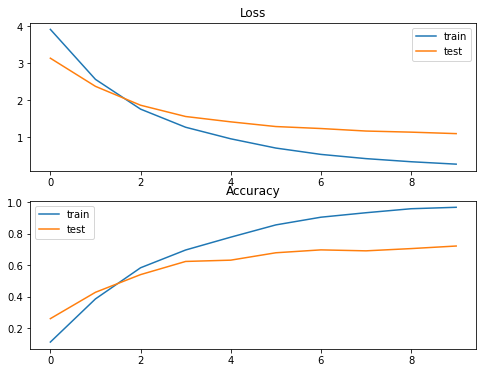

In [ ]:
# Plotting learning curve for model 1 with 10 epochs 

summarize_model(history_1_10)

In [ ]:
# Testing model 1 with 10 epochs 

testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

16/16 [==============================] - 82s 5s/step - loss: 1.1505 - accuracy: 0.7064


In [ ]:
# Training model 1 with 20 epochs 

history_1_20 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 732s 74s/step - loss: 3.5878 - accuracy: 0.1582 - val_loss: 2.8112 - val_accuracy: 0.3238
Epoch 2/20
10/10 [==============================] - 730s 74s/step - loss: 2.1447 - accuracy: 0.4936 - val_loss: 2.0577 - val_accuracy: 0.5010
Epoch 3/20
10/10 [==============================] - 743s 75s/step - loss: 1.4153 - accuracy: 0.6572 - val_loss: 1.6450 - val_accuracy: 0.5906
Epoch 4/20
10/10 [==============================] - 728s 73s/step - loss: 0.9721 - accuracy: 0.7789 - val_loss: 1.4339 - val_accuracy: 0.6456
Epoch 5/20
10/10 [==============================] - 715s 72s/step - loss: 0.7123 - accuracy: 0.8479 - val_loss: 1.3111 - val_accuracy: 0.6701
Epoch 6/20
10/10 [==============================] - 714s 72s/step - loss: 0.5138 - accuracy: 0.9016 - val_loss: 1.2354 - val_accuracy: 0.6884
Epoch 7/20
10/10 [==============================] - 719s 73s/step - loss: 0.3864 - accuracy: 0.9433 - val_loss: 1.1644 - val_accuracy: 0.7067
Epoch 

In [ ]:
# Testing model 1 with 20 epochs
 
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

16/16 [==============================] - 81s 5s/step - loss: 0.9963 - accuracy: 0.7310


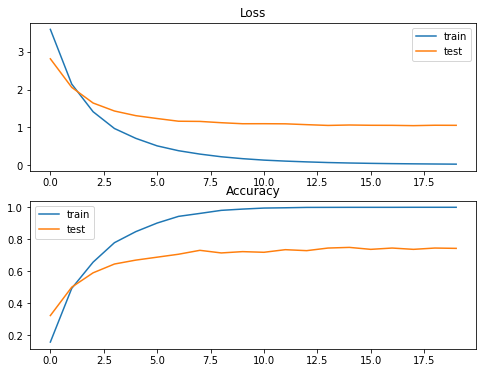

In [ ]:
# Plotting learning curve for model 1 with 20 epochs 

summarize_model(history_1_20)

# **Model 2**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_2 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_2.add(pretrained_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_2.add(Dense(50, activation='softmax'))
model_2.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 50)                51250     
                                                                 
Total params: 25,213,362
Trainable params: 1,625,650
Non-trainable params: 23,587,712
_____________________________________

In [ ]:
# Compiling model 2

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training model 2 with 10 epochs

history_2_10 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

In [ ]:
# Plotting learning curve for model 2 with 10 epochs

summarize_model(history_2_10)

In [ ]:
# Testing model 2 with 10 epochs

testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

In [ ]:
# Training model 2 with 20 epochs

history_2_20 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

In [ ]:
# Plotting learning curve for model 2 with 20 epochs

summarize_model(history_2_20)

In [ ]:
# Testing model 2 with 20 epochs

testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)